In [25]:
# Importation bibliothèques et modules Python
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier


bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

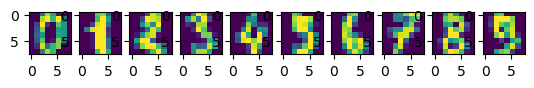

In [26]:
# Importation du dataset digits de scikit-learn
from sklearn.datasets import load_digits

# Sauvegarde du dataset digits de scikit-learn dans la variable digits
digits = load_digits()

# Affichage des 10 premières images
import matplotlib.pyplot as plt
fig = plt.figure()
for i, digit in enumerate(digits.images[:10]):
    fig.add_subplot(1,10,i+1)
    plt.imshow(digit)
plt.show()

In [27]:
import numpy as np
from sklearn import tree
from sklearn.ensemble import BaggingClassifier

X, y = digits.data, digits.target
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)
accuracy = clf.score(X,y)
print(accuracy)

1.0


In [28]:
from sklearn.model_selection import train_test_split
# 90% des données pour le test, 10% pour l'apprentissage
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

# Chargement du modèle decision tree classifier
clf = tree.DecisionTreeClassifier()

# Application du modèle random forest à nos données
clf.fit(X_train, y_train)

# Prédiction du modèle sur les données de test
Z = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy=clf.score(X_test,y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))

Accuracy = 0.6650185414091471


In [29]:
N = 100
accuracies = []
for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    Z = clf.predict(X_test)
    accuracies.append(clf.score(X_test,y_test))
    print(accuracies[i])

print(np.mean(accuracies), np.std(accuracies))

0.8888888888888888
0.9222222222222223
0.8888888888888888
0.8666666666666667
0.7888888888888889
0.8777777777777778
0.8777777777777778
0.8888888888888888
0.8333333333333334
0.9
0.8555555555555555
0.8555555555555555
0.8555555555555555
0.8555555555555555
0.8444444444444444
0.8555555555555555
0.7666666666666667
0.9
0.8555555555555555
0.7888888888888889
0.8777777777777778
0.8888888888888888
0.8111111111111111
0.8333333333333334
0.8888888888888888
0.8444444444444444
0.9
0.8444444444444444
0.8222222222222222
0.8888888888888888
0.9
0.8777777777777778
0.8777777777777778
0.8555555555555555
0.8777777777777778
0.9111111111111111
0.9
0.8777777777777778
0.8111111111111111
0.9
0.8666666666666667
0.8111111111111111
0.8222222222222222
0.8222222222222222
0.8777777777777778
0.8111111111111111
0.8555555555555555
0.9
0.8222222222222222
0.8555555555555555
0.8222222222222222
0.8888888888888888
0.8333333333333334
0.8333333333333334
0.9111111111111111
0.7777777777777778
0.8333333333333334
0.8888888888888888
0.7

In [30]:
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)

In [31]:
# Application du modèle random forest à nos données
clf.fit(X_train, y_train)

# Prédiction du modèle sur les données de test
Z = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy=clf.score(X_test,y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))

Accuracy = 1.0


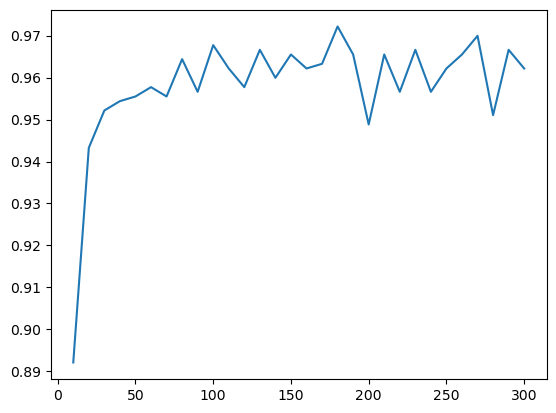

In [32]:
N = 30
accuracy = []

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    
    # Application du modèle bagging classifier
    clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=(i+1)*10)
    
    # Application du modèle aux données d'entrainement
    clf.fit(X_train, y_train)
    
    # Prédiction sur les données de test
    Z = clf.predict(X_test)
    accuracy.append(clf.score(X_test,y_test))

import matplotlib.pyplot as plt
plt.plot([10*(i+1) for i in range(N)], accuracy)
plt.show()

In [33]:
digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

from sklearn.model_selection import GridSearchCV
pgrid = {"max_samples": [0.2, 0.4, 0.6, 0.8],
        "max_features": [0.2, 0.4, 0.6, 0.8]}
grid_search = GridSearchCV(BaggingClassifier(tree.DecisionTreeClassifier()), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print("Meilleur score : " + str(grid_search.best_estimator_.score(X_test, y_test)))
print("max_samples: " + str(grid_search.best_estimator_.max_samples))
print("max_features: " + str(grid_search.best_estimator_.max_features))

Meilleur score : 0.917686318131257
max_samples: 0.8
max_features: 0.6


In [34]:
digits = load_digits()
X, y = digits.data, digits.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.90)

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Chargement du modèle random forest classifier
clf = RandomForestClassifier(n_estimators=200)

# Application du modèle
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [36]:
# prédiction des résultats du modèle random forest classifier
y_pred = clf.predict(X_test)

# Calcul de l'accuracy du modèle sur les données de test
accuracy = clf.score(X_test, y_test)

# Affichage de l'accuracy du modèle sur les données de test
print("Accuracy = {}".format(accuracy))


Accuracy = 0.9245982694684796


In [37]:
# Chargement et application du modèle decision tree classifier
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Arbre de décision : " + str(clf.score(X_test,y_test)))

# Chargement et application du modèle bagging classifier
clf = BaggingClassifier(tree.DecisionTreeClassifier(), max_samples=0.5, max_features=0.5, n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Bagging (200 arbres) : " + str(clf.score(X_test,y_test)))

# Chargement et application du modèle random forest classifier
clf = RandomForestClassifier(n_estimators=200)
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print("Forêt aléatoire (200 arbres) : " + str(clf.score(X_test,y_test)))

Arbre de décision : 0.6878862793572311
Bagging (200 arbres) : 0.9091470951792336
Forêt aléatoire (200 arbres) : 0.9208899876390606
